In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Guvi-Loan Deafault Preiction Project/loan_default_prediction_project_complete.csv')

In [3]:
df.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.054000,60026.281455,575.114100,0.505075,24987.100093,27420.008134,11.520288,41.251400
std,13.484104,23325.125697,156.836488,0.288439,14553.399559,12929.128033,4.904728,17.309152
min,18.000000,20000.743678,250.000000,0.000048,5.755463,5021.968396,3.003891,12.000000
25%,30.000000,39846.858060,443.000000,0.256201,12390.943603,16202.680782,7.252370,26.000000
50%,41.000000,59841.754386,578.000000,0.504999,24815.252605,27465.829975,11.572578,41.000000
75%,53.000000,80025.261332,709.000000,0.758348,37840.503151,38546.866743,15.705539,56.000000
max,64.000000,150000.000000,849.000000,0.999895,49983.832438,49983.285875,19.998504,71.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 8005 non-null   object 
 2   Income                 10000 non-null  float64
 3   Employment_Status      9013 non-null   object 
 4   Location               10000 non-null  object 
 5   Credit_Score           10000 non-null  int64  
 6   Debt_to_Income_Ratio   10000 non-null  float64
 7   Existing_Loan_Balance  10000 non-null  float64
 8   Loan_Status            10000 non-null  object 
 9   Loan_Amount            10000 non-null  float64
 10  Interest_Rate          10000 non-null  float64
 11  Loan_Duration_Months   10000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [5]:
df.isna().sum()

Age                         0
Gender                   1995
Income                      0
Employment_Status         987
Location                    0
Credit_Score                0
Debt_to_Income_Ratio        0
Existing_Loan_Balance       0
Loan_Status                 0
Loan_Amount                 0
Interest_Rate               0
Loan_Duration_Months        0
dtype: int64

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Gender               1995
Employment_Status     987
dtype: int64


In [7]:
# Impute missing values with 'Unknown'
df['Gender'].fillna('Unknown', inplace=True)

print(df['Gender'].isnull().sum()) 

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\2774894870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)


In [8]:
# Impute missing values with 'Unknown'
df['Employment_Status'].fillna('Unknown', inplace=True)

print(df['Employment_Status'].isnull().sum())

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\1612455751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment_Status'].fillna('Unknown', inplace=True)


In [9]:
df.isna().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(10000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Income                 10000 non-null  float64
 3   Employment_Status      10000 non-null  object 
 4   Location               10000 non-null  object 
 5   Credit_Score           10000 non-null  int64  
 6   Debt_to_Income_Ratio   10000 non-null  float64
 7   Existing_Loan_Balance  10000 non-null  float64
 8   Loan_Status            10000 non-null  object 
 9   Loan_Amount            10000 non-null  float64
 10  Interest_Rate          10000 non-null  float64
 11  Loan_Duration_Months   10000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [13]:
df.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [14]:
# List of ordinal categorical columns to be label encoded
ordinal_columns = ['Employment_Status']  # Example, adjust based on your dataset

# Apply Label Encoding
label_encoders = {}
for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the label encoder for future use or inverse transformation

# List of nominal categorical columns to be one-hot encoded
nominal_columns = ['Gender', 'Location']  # Example, adjust based on your dataset

# One-Hot Encoding without dropping the first column to understand the full set of generated features
encoder = OneHotEncoder(sparse_output=False, drop=None)  # **Keep all categories**
encoded_features = encoder.fit_transform(df[nominal_columns])

# Inspect the shape and content of encoded features
encoded_feature_names = encoder.get_feature_names_out(nominal_columns)
print("Encoded feature names:", encoded_feature_names)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine encoded features with the original DataFrame, excluding the original nominal columns
df_encoded = pd.concat([df.drop(nominal_columns, axis=1), encoded_df], axis=1)

# Encode the target variable 'Loan_Status'
le_status = LabelEncoder()
df_encoded['Loan_Status'] = le_status.fit_transform(df_encoded['Loan_Status'])

# Display the final DataFrame
print(df_encoded)

Encoded feature names: ['Gender_Female' 'Gender_Male' 'Gender_Unknown' 'Location_Rural'
 'Location_Suburban' 'Location_Urban']
      Age        Income  Employment_Status  Credit_Score  \
0      56  91910.323246                  0           615   
1      46  81880.547904                  2           702   
2      32  89696.082903                  1           747   
3      60  37123.175342                  2           846   
4      25  67655.479665                  1           425   
...   ...           ...                ...           ...   
9995   33  94318.593216                  0           359   
9996   29  22480.468746                  0           671   
9997   18  88172.496665                  0           441   
9998   25  51788.871823                  0           417   
9999   30  64928.131098                  0           491   

      Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0                 0.462601            3580.203540            1  27160.60

In [15]:
import numpy as np

# Define numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))

# Print outlier indices
print("Outlier indices:\n", np.where(outliers))

# Removing rows with outliers
df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the number of rows before and after outlier removal
print(f'Original data size: {df.shape}')
print(f'Cleaned data size: {df_cleaned.shape}')

Outlier indices:
 (array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
Original data size: (10000, 12)
Cleaned data size: (9990, 12)


In [16]:
# Display the imbalance
print("Imbalance in Loan_Status column:\n", df['Loan_Status'].value_counts())
imbalance_ratio = df['Loan_Status'].value_counts()['Non-Default'] / df['Loan_Status'].value_counts()['Default']
print(f"Imbalance ratio: {imbalance_ratio}")

Imbalance in Loan_Status column:
 Loan_Status
Non-Default    8033
Default        1967
Name: count, dtype: int64
Imbalance ratio: 4.083884087442806


In [18]:
# List of numerical columns to be scaled
numerical_columns = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio', 
                     'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [19]:
# Handle class imbalance
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

In [23]:
df_encoded.columns

Index(['Age', 'Income', 'Employment_Status', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Status',
       'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months', 'Gender_Female',
       'Gender_Male', 'Gender_Unknown', 'Location_Rural', 'Location_Suburban',
       'Location_Urban'],
      dtype='object')

In [20]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Resampled class distribution:
 Loan_Status
1    8033
0    8033
Name: count, dtype: int64


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [25]:
# Train the model
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
df_encoded.columns

Index(['Age', 'Income', 'Employment_Status', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Status',
       'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months', 'Gender_Female',
       'Gender_Male', 'Gender_Unknown', 'Location_Rural', 'Location_Suburban',
       'Location_Urban'],
      dtype='object')

In [27]:
# Make predictions
y_pred = RFC.predict(X_test)
y_scores = RFC.predict_proba(X_test)[:, 1]

In [28]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2393
           1       0.82      0.88      0.85      2427

    accuracy                           0.84      4820
   macro avg       0.84      0.84      0.84      4820
weighted avg       0.84      0.84      0.84      4820

[[1921  472]
 [ 295 2132]]
ROC-AUC Score: 0.9103985994034586


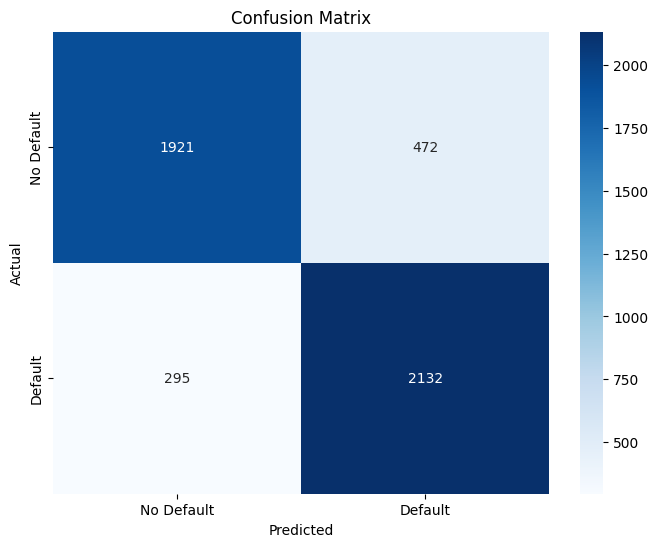

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

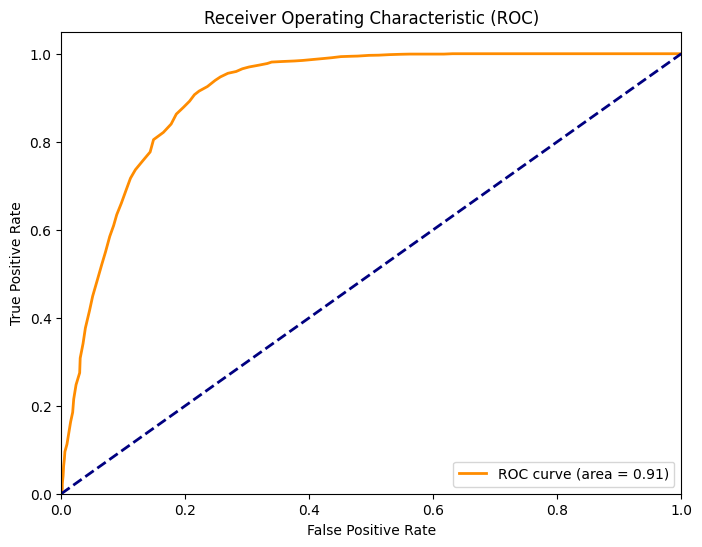

In [30]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_scores are your true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

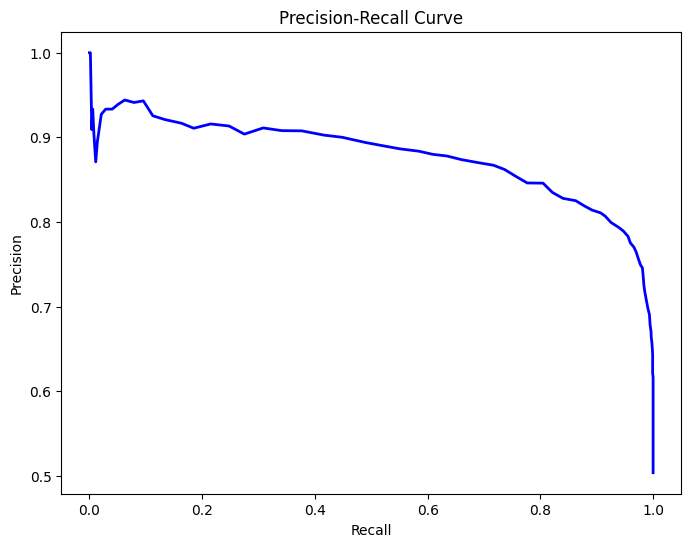

In [31]:
from sklearn.metrics import precision_recall_curve

# Assuming y_test and y_scores are your true labels and predicted probabilities
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

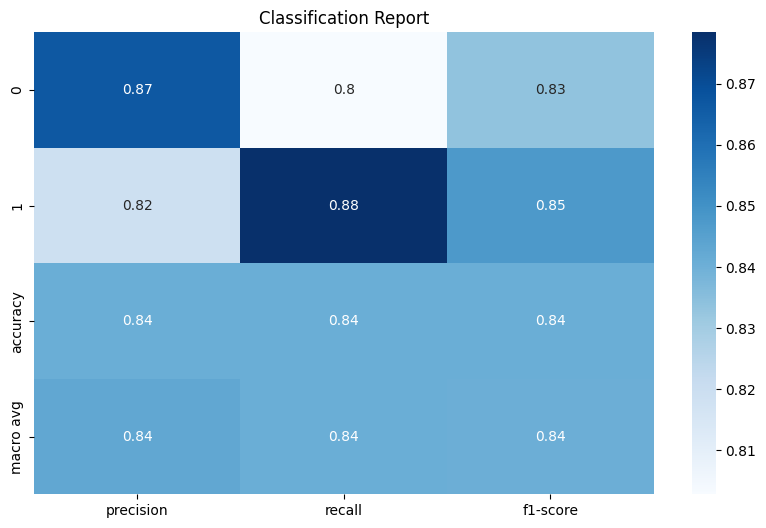

In [32]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

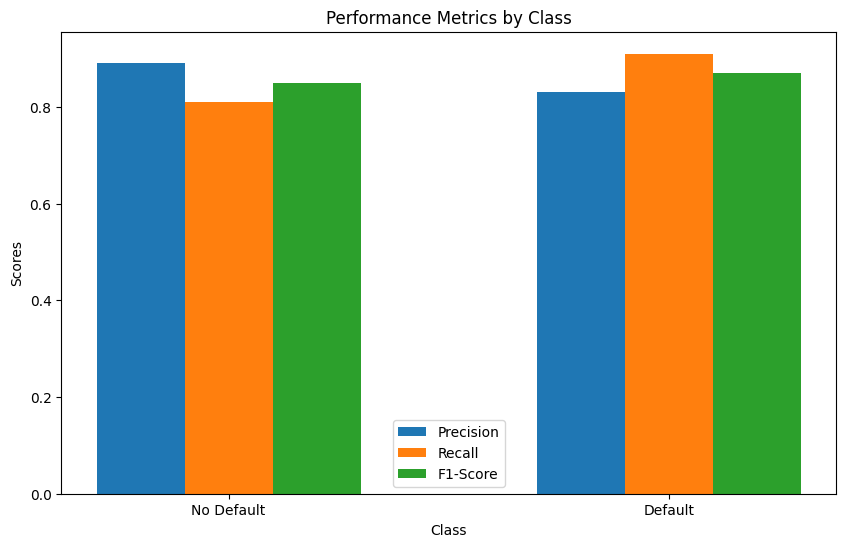

In [33]:
metrics = {
    'Precision': [0.89, 0.83],
    'Recall': [0.81, 0.91],
    'F1-Score': [0.85, 0.87]
}

classes = ['No Default', 'Default']

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

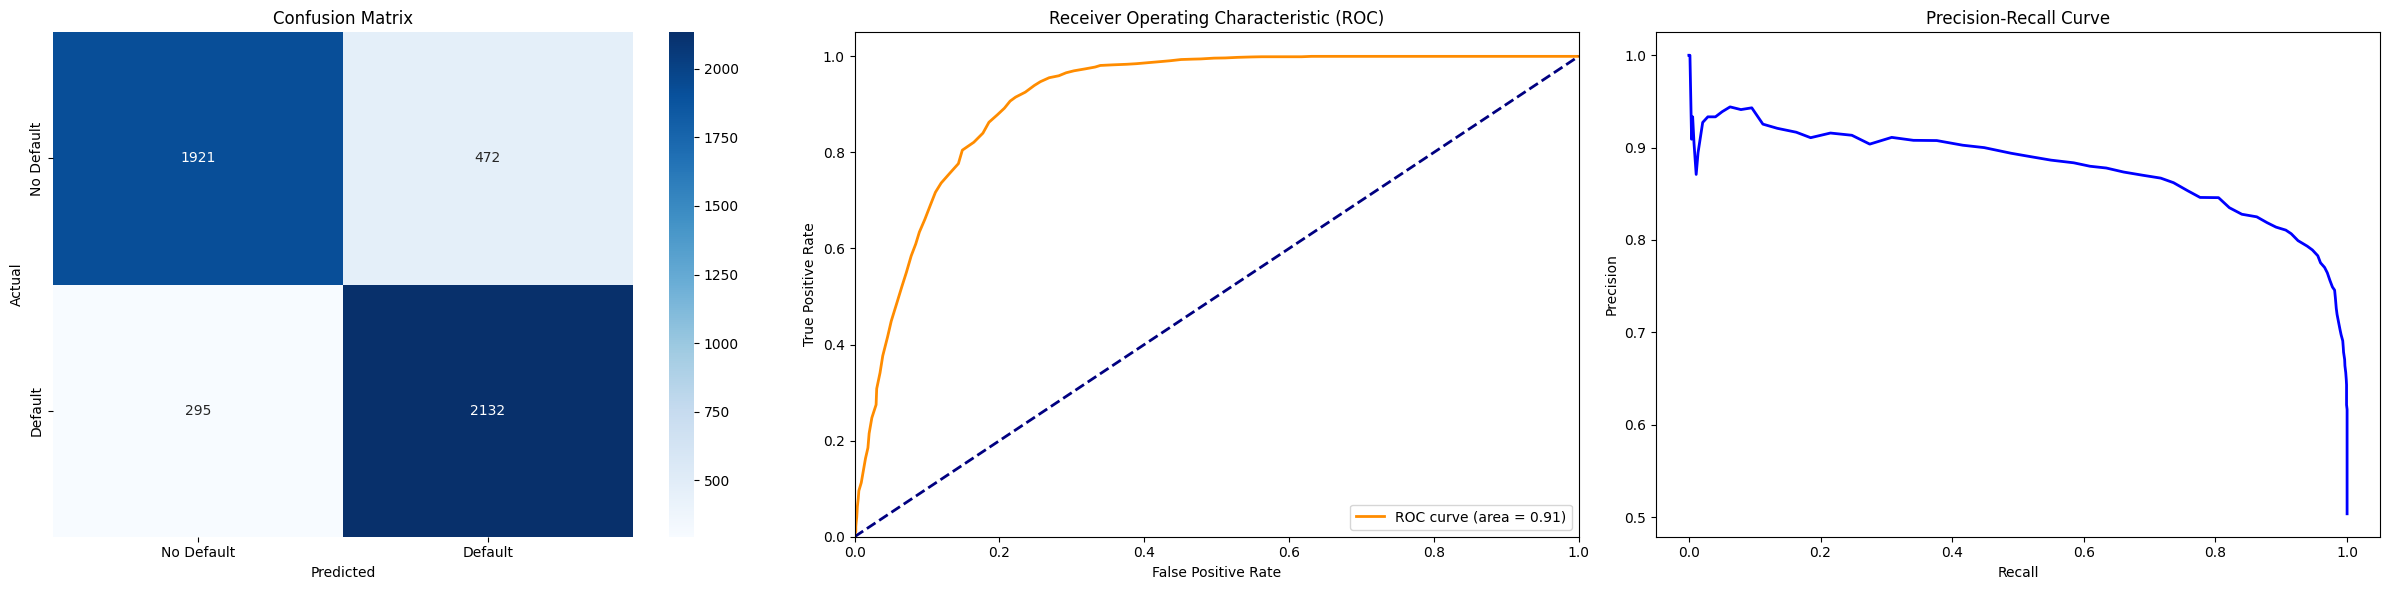

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'], ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix')

# ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC)')
axs[1].legend(loc='lower right')

# Precision-Recall Curve
axs[2].plot(recall, precision, color='blue', lw=2)
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

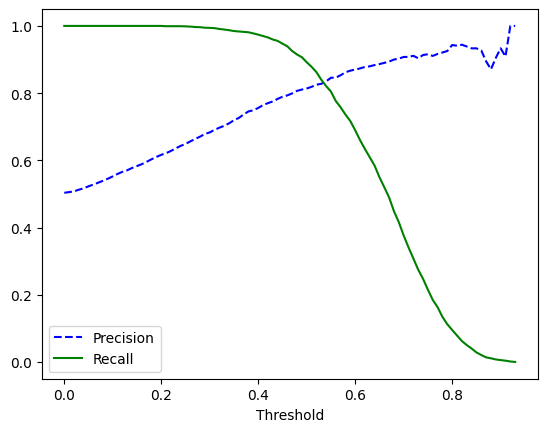

In [35]:
# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall vs threshold
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

# Select a threshold
optimal_threshold = thresholds[np.argmax(precisions + recalls)]
y_pred_threshold = (y_scores >= optimal_threshold).astype(int)

HYPERPARAMETER TUNING

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_}")

# Use the best estimator for predictions
best_RFC = grid_search.best_estimator_
y_pred_best = best_RFC.predict(X_test)
y_scores_best = best_RFC.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC Score: 0.9032241596130767
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2393
           1       0.82      0.89      0.86      2427

    accuracy                           0.85      4820
   macro avg       0.85      0.85      0.85      4820
weighted avg       0.85      0.85      0.85      4820

[[1926  467]
 [ 262 2165]]
ROC-AUC Score: 0.9136072954164658


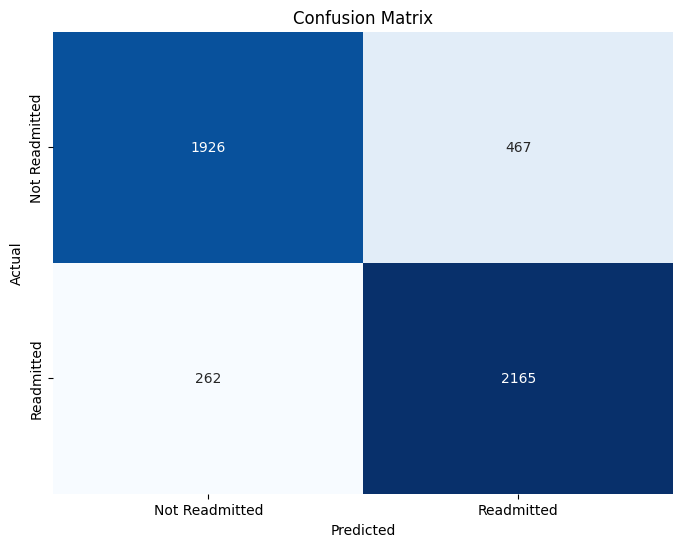

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix
conf_matrix = np.array([[1926, 467], [262, 2165]])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

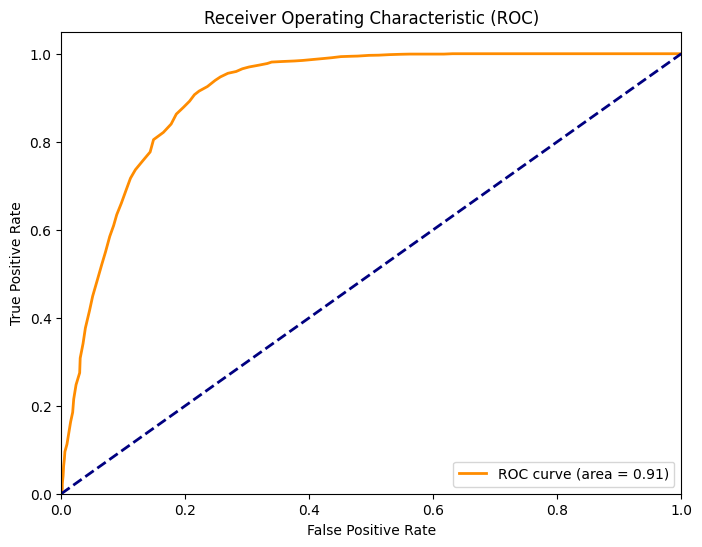

In [44]:
from sklearn.metrics import roc_curve, auc

# Assuming you have y_true and y_scores
# y_true = actual labels
# y_scores = predicted scores or probabilities for the positive class

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

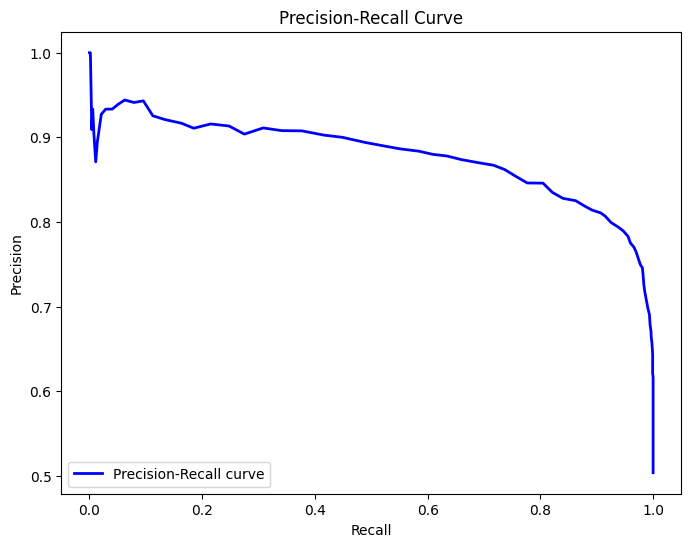

In [45]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

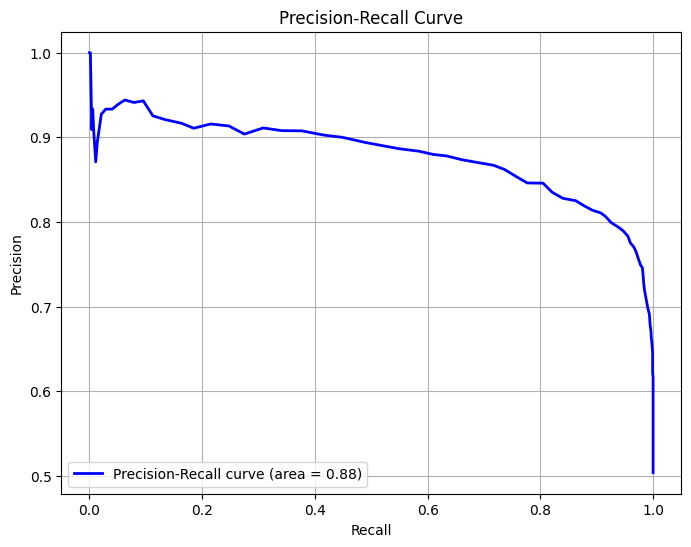

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming y_true and y_scores are defined
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

using an XGBoost Classifier (XGBClassifier), which is a specific type of classification model.

XGBoost other types of classification models

In [53]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

d:\Guvi-Loan Deafault Preiction Project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[1464  929]
 [ 941 1486]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2393
           1       0.62      0.61      0.61      2427

    accuracy                           0.61      4820
   macro avg       0.61      0.61      0.61      4820
weighted avg       0.61      0.61      0.61      4820

Accuracy Score:
0.6120331950207469


In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the model
model = XGBClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score found: ", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print('ROC-AUC Score:')
print(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best ROC-AUC score found:  0.8927615225178582
Confusion Matrix:
[[1509  884]
 [ 976 1451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      2393
           1       0.62      0.60      0.61      2427

    accuracy                           0.61      4820
   macro avg       0.61      0.61      0.61      4820
weighted avg       0.61      0.61      0.61      4820

Accuracy Score:
0.6141078838174274
ROC-AUC Score:
0.668422233437004


In [48]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

LR = LogisticRegression(random_state=42)
LR.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = LR.predict(X_test)
y_scores = LR.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores))

d:\Guvi-Loan Deafault Preiction Project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.53      0.66      0.59      2393
           1       0.56      0.42      0.48      2427

    accuracy                           0.54      4820
   macro avg       0.54      0.54      0.53      4820
weighted avg       0.54      0.54      0.53      4820

[[1581  812]
 [1402 1025]]
ROC-AUC Score: 0.553921606608755


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],         # Type of regularization
    'solver': ['liblinear']          # Solver for optimization (liblinear supports l1 penalty)
}

# Initialize the logistic regression model
lr = LogisticRegression(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Fit the GridSearchCV to the resampled and scaled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC-AUC Score from Grid Search:", best_score)

# Train the logistic regression model with the best parameters
best_lr = grid_search.best_estimator_

# Make predictions
y_pred = best_lr.predict(X_test)
y_scores = best_lr.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_scores))

d:\Guvi-Loan Deafault Preiction Project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC-AUC Score from Grid Search: 0.5624720210250993
              precision    recall  f1-score   support

           0       0.50      0.81      0.62      2393
           1       0.51      0.20      0.28      2427

    accuracy                           0.50      4820
   macro avg       0.50      0.50      0.45      4820
weighted avg       0.50      0.50      0.45      4820

[[1930  463]
 [1953  474]]
ROC-AUC Score: 0.5207645358982929
